In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [45]:
legi=pd.read_csv(r'/kaggle/input/knorodroid-processed/real_legitimate_v1.csv')
mal=pd.read_csv(r'/kaggle/input/knorodroid-processed/real_malware_v1.csv')

In [46]:
fin=pd.concat([legi,mal],axis=0).reset_index(drop=True)

In [47]:
fin.shape

(78137, 484)

In [48]:
fin=fin.sample(frac=1)
fin.head(7)

,Package,Malware,execve,getuid32,getgid32,geteuid32,getegid32,getresuid32,getresgid32,readahead,getgroups32,getpgid,getppid,getsid,setsid,setgid32,setuid32,setreuid32,setresuid32,setresgid32,brk,kill,tgkill,ptrace,getrusage,getpriority,setpriority,ugetrlimit,setrlimit,prlimit64,setgroups32,setpgid,setregid32,chroot,prctl,capget,capset,sigaltstack,acct,read,write,pread64,pwrite64,preadv,pwritev,close,getpid,munmap,mremap,msync,mprotect,madvise,mlock,munlock,mlockall,munlockall,mincore,ioctl,readv,writev,fcntl64,flock,fchmod,dup,pipe2,dup3,fsync,fdatasync,fchown32,sync,fsetxattr,fgetxattr,flistxattr,fremovexattr,getdents64,openat,faccessat,fchmodat,fchownat,fstatat64,linkat,mkdirat,mknodat,readlinkat,renameat,symlinkat,unlinkat,utimensat,lseek,_llseek,ftruncate64,sendfile,sendfile64,truncate,truncate64,mmap2,fallocate,fadvise64_64,fstatfs64,statfs64,fstat64,chdir,mount,umount2,getcwd,fchdir,setxattr,lsetxattr,getxattr,lgetxattr,listxattr,llistxattr,removexattr,lremovexattr,swapon,swapoff,settimeofday,times,nanosleep,clock_settime,clock_getres,clock_nanosleep,getitimer,setitimer,timer_create,timer_settime,timer_gettime,timer_getoverrun,timer_delete,timerfd_create,timerfd_settime,timerfd_gettime,adjtimex,clock_adjtime,sigaction,rt_sigaction,rt_sigpending,rt_sigprocmask,rt_sigsuspend,rt_sigtimedwait,rt_sigqueueinfo,signalfd4,socket,bind,connect,listen,getsockname,getpeername,socketpair,sendto,recvfrom,shutdown,setsockopt,getsockopt,sendmsg,recvmsg,accept4,recvmmsg,sendmmsg,sched_setscheduler,sched_getscheduler,sched_yield,sched_setparam,sched_getparam,sched_get_priority_max,sched_get_priority_min,sched_rr_get_interval,sched_setaffinity,setns,unshare,sched_getaffinity,getcpu,uname,umask,reboot,init_module,delete_module,syslog,sysinfo,personality,tee,splice,vmsplice,epoll_create1,epoll_ctl,epoll_pwait,eventfd2,exit_group,exit,inotify_init1,inotify_add_watch,inotify_rm_watch,pselect6,ppoll,process_vm_readv,set_tid_address,setfsgid,setfsuid,sethostname,wait4,waitid,set_thread_area,clock_gettime,gettimeofday,clone,futex,vfork,rt_sigreturn,restart_syscall,getrandom,gettid,epoll_wait,stat64,pipe,pread,getrlimit,pwrite,recv,open,syscall_983042,SYS_300,SYS_301,SYS_302,SYS_303,SYS_304,SYS_305,SYS_306,SYS_307,SYS_308,SYS_309,SYS_310,SYS_311,SYS_312,SYS_313,SYS_314,SYS_315,SYS_316,SYS_317,SYS_318,SYS_319,SYS_320,SYS_321,SYS_322,SYS_323,SYS_324,SYS_325,SYS_326,SYS_327,SYS_328,SYS_329,SYS_330,SYS_331,SYS_332,SYS_333,SYS_334,SYS_335,SYS_336,SYS_337,SYS_338,SYS_339,SYS_340,SYS_341,SYS_342,SYS_343,SYS_344,SYS_345,SYS_346,SYS_347,SYS_348,SYS_349,SYS_350,SYS_351,SYS_352,SYS_353,SYS_354,SYS_355,SYS_356,SYS_357,SYS_358,SYS_359,SYS_360,SYS_361,SYS_362,SYS_363,SYS_364,SYS_365,SYS_366,SYS_367,SYS_368,SYS_369,nr_syscalls,ACCEPT_HANDOVER,ACCESS_BACKGROUND_LOCATION,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MEDIA_LOCATION,ACCESS_NETWORK_STATE,ACCESS_NOTIFICATION_POLICY,ACCESS_WIFI_STATE,ACCOUNT_MANAGER,ACTIVITY_RECOGNITION,ADD_VOICEMAIL,ANSWER_PHONE_CALLS,BATTERY_STATS,BIND_ACCESSIBILITY_SERVICE,BIND_APPWIDGET,BIND_AUTOFILL_SERVICE,BIND_CALL_REDIRECTION_SERVICE,BIND_CARRIER_MESSAGING_CLIENT_SERVICE,BIND_CARRIER_MESSAGING_SERVICE,BIND_CARRIER_SERVICES,BIND_CHOOSER_TARGET_SERVICE,BIND_CONDITION_PROVIDER_SERVICE,BIND_CONTROLS,BIND_DEVICE_ADMIN,BIND_DREAM_SERVICE,BIND_INCALL_SERVICE,BIND_INPUT_METHOD,BIND_MIDI_DEVICE_SERVICE,BIND_NFC_SERVICE,BIND_NOTIFICATION_LISTENER_SERVICE,BIND_PRINT_SERVICE,BIND_QUICK_ACCESS_WALLET_SERVICE,BIND_QUICK_SETTINGS_TILE,BIND_REMOTEVIEWS,BIND_SCREENING_SERVICE,BIND_TELECOM_CONNECTION_SERVICE,BIND_TEXT_SERVICE,BIND_TV_INPUT,BIND_VISUAL_VOICEMAIL_SERVICE,BIND_VOICE_INTERACTION,BIND_VPN_SERVICE,BIND_VR_LISTENER_SERVICE,BIND_WALLPAPER,BLUETOOTH,BLUETOOTH_ADMIN,BLUETOOTH_PRIVILEGED,BODY_SENSORS,BROADCAST_PACKAGE_REMOVED,BROADCAST_SMS,BROADCAST_STICKY,BROADCAST_WAP_PUSH,CALL_COMPANION_APP,CALL_PHONE,CALL_PRIVILEGED,CAMERA,CAPTURE_AUDIO_OUTPUT,CHANGE_COMPONENT_ENABLED_STATE,

In [49]:
re=list(fin.isnull().sum())
idx=0
are=[i for i,j in enumerate(re,idx) if(j!=0)]
#are=[re.index(x) for x in re if x!=0]
are

[472, 473, 474, 475, 476, 477, 478, 479, 480, 483]

In [50]:
pd.options.display.max_columns=None
fin["Malware"].value_counts()

Malware
1    41382
0    36755
Name: count, dtype: int64

In [51]:
thor_fin=fin.iloc[:,are]
thor_fin.head()

,Activities,NrIntServices,NrIntServicesActions,NrIntActivities,NrIntActivitiesActions,NrIntReceivers,NrIntReceiversActions,TotalIntentFilters,NrServices,MalFamily
11205,7.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,0.0,NaN
50149,6.0,0.0,0.0,2.0,2.0,0.0,6.0,3.0,2.0,Boqx
55302,12.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,4.0,Airpush/StopSMS
5775,18.0,0.0,0.0,6.0,9.0,0.0,2.0,8.0,4.0,NaN
49307,1.0,0.0,0.0,1.0,1.0,0.0,5.0,2.0,1.0,Locker/SLocker Ransomware


In [52]:
fin=fin[[x for x in fin.columns if(x not in thor_fin.columns)]]
fin.head()

,Package,Malware,execve,getuid32,getgid32,geteuid32,getegid32,getresuid32,getresgid32,readahead,getgroups32,getpgid,getppid,getsid,setsid,setgid32,setuid32,setreuid32,setresuid32,setresgid32,brk,kill,tgkill,ptrace,getrusage,getpriority,setpriority,ugetrlimit,setrlimit,prlimit64,setgroups32,setpgid,setregid32,chroot,prctl,capget,capset,sigaltstack,acct,read,write,pread64,pwrite64,preadv,pwritev,close,getpid,munmap,mremap,msync,mprotect,madvise,mlock,munlock,mlockall,munlockall,mincore,ioctl,readv,writev,fcntl64,flock,fchmod,dup,pipe2,dup3,fsync,fdatasync,fchown32,sync,fsetxattr,fgetxattr,flistxattr,fremovexattr,getdents64,openat,faccessat,fchmodat,fchownat,fstatat64,linkat,mkdirat,mknodat,readlinkat,renameat,symlinkat,unlinkat,utimensat,lseek,_llseek,ftruncate64,sendfile,sendfile64,truncate,truncate64,mmap2,fallocate,fadvise64_64,fstatfs64,statfs64,fstat64,chdir,mount,umount2,getcwd,fchdir,setxattr,lsetxattr,getxattr,lgetxattr,listxattr,llistxattr,removexattr,lremovexattr,swapon,swapoff,settimeofday,times,nanosleep,clock_settime,clock_getres,clock_nanosleep,getitimer,setitimer,timer_create,timer_settime,timer_gettime,timer_getoverrun,timer_delete,timerfd_create,timerfd_settime,timerfd_gettime,adjtimex,clock_adjtime,sigaction,rt_sigaction,rt_sigpending,rt_sigprocmask,rt_sigsuspend,rt_sigtimedwait,rt_sigqueueinfo,signalfd4,socket,bind,connect,listen,getsockname,getpeername,socketpair,sendto,recvfrom,shutdown,setsockopt,getsockopt,sendmsg,recvmsg,accept4,recvmmsg,sendmmsg,sched_setscheduler,sched_getscheduler,sched_yield,sched_setparam,sched_getparam,sched_get_priority_max,sched_get_priority_min,sched_rr_get_interval,sched_setaffinity,setns,unshare,sched_getaffinity,getcpu,uname,umask,reboot,init_module,delete_module,syslog,sysinfo,personality,tee,splice,vmsplice,epoll_create1,epoll_ctl,epoll_pwait,eventfd2,exit_group,exit,inotify_init1,inotify_add_watch,inotify_rm_watch,pselect6,ppoll,process_vm_readv,set_tid_address,setfsgid,setfsuid,sethostname,wait4,waitid,set_thread_area,clock_gettime,gettimeofday,clone,futex,vfork,rt_sigreturn,restart_syscall,getrandom,gettid,epoll_wait,stat64,pipe,pread,getrlimit,pwrite,recv,open,syscall_983042,SYS_300,SYS_301,SYS_302,SYS_303,SYS_304,SYS_305,SYS_306,SYS_307,SYS_308,SYS_309,SYS_310,SYS_311,SYS_312,SYS_313,SYS_314,SYS_315,SYS_316,SYS_317,SYS_318,SYS_319,SYS_320,SYS_321,SYS_322,SYS_323,SYS_324,SYS_325,SYS_326,SYS_327,SYS_328,SYS_329,SYS_330,SYS_331,SYS_332,SYS_333,SYS_334,SYS_335,SYS_336,SYS_337,SYS_338,SYS_339,SYS_340,SYS_341,SYS_342,SYS_343,SYS_344,SYS_345,SYS_346,SYS_347,SYS_348,SYS_349,SYS_350,SYS_351,SYS_352,SYS_353,SYS_354,SYS_355,SYS_356,SYS_357,SYS_358,SYS_359,SYS_360,SYS_361,SYS_362,SYS_363,SYS_364,SYS_365,SYS_366,SYS_367,SYS_368,SYS_369,nr_syscalls,ACCEPT_HANDOVER,ACCESS_BACKGROUND_LOCATION,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MEDIA_LOCATION,ACCESS_NETWORK_STATE,ACCESS_NOTIFICATION_POLICY,ACCESS_WIFI_STATE,ACCOUNT_MANAGER,ACTIVITY_RECOGNITION,ADD_VOICEMAIL,ANSWER_PHONE_CALLS,BATTERY_STATS,BIND_ACCESSIBILITY_SERVICE,BIND_APPWIDGET,BIND_AUTOFILL_SERVICE,BIND_CALL_REDIRECTION_SERVICE,BIND_CARRIER_MESSAGING_CLIENT_SERVICE,BIND_CARRIER_MESSAGING_SERVICE,BIND_CARRIER_SERVICES,BIND_CHOOSER_TARGET_SERVICE,BIND_CONDITION_PROVIDER_SERVICE,BIND_CONTROLS,BIND_DEVICE_ADMIN,BIND_DREAM_SERVICE,BIND_INCALL_SERVICE,BIND_INPUT_METHOD,BIND_MIDI_DEVICE_SERVICE,BIND_NFC_SERVICE,BIND_NOTIFICATION_LISTENER_SERVICE,BIND_PRINT_SERVICE,BIND_QUICK_ACCESS_WALLET_SERVICE,BIND_QUICK_SETTINGS_TILE,BIND_REMOTEVIEWS,BIND_SCREENING_SERVICE,BIND_TELECOM_CONNECTION_SERVICE,BIND_TEXT_SERVICE,BIND_TV_INPUT,BIND_VISUAL_VOICEMAIL_SERVICE,BIND_VOICE_INTERACTION,BIND_VPN_SERVICE,BIND_VR_LISTENER_SERVICE,BIND_WALLPAPER,BLUETOOTH,BLUETOOTH_ADMIN,BLUETOOTH_PRIVILEGED,BODY_SENSORS,BROADCAST_PACKAGE_REMOVED,BROADCAST_SMS,BROADCAST_STICKY,BROADCAST_WAP_PUSH,CALL_COMPANION_APP,CALL_PHONE,CALL_PRIVILEGED,CAMERA,CAPTURE_AUDIO_OUTPUT,CHANGE_COMPONENT_ENABLED_STATE,

In [53]:
fin.shape

(78137, 474)

In [54]:
sum(fin.isnull().sum())

0

In [55]:
for x in fin.columns:
    if(fin[x].dtype=="object"):
        print(x,"  ",fin[x].dtype)
        fin=fin.drop(x,axis=1)
    else:
        fin[x]=fin[x].astype("float64")

Package    object
sha256    object
EarliestModDate    object
HighestModDate    object


In [56]:
fin.shape

(78137, 470)

In [57]:
'''
for x in fin.columns:
    print(x," ",fin[x].dtype)
'''

'\nfor x in fin.columns:\n    print(x," ",fin[x].dtype)\n'

In [58]:
fin.shape

(78137, 470)

# IMPORTANT NOTE ! - LIST ASSUMPTIONS BEING MADE FOR THIS ALGORITHM APPLICATION

## we are not using flower framework to apply the federated learning for the sake of simplicity.. we are concentrated on the drift detection algorithm of Fed-Drift Eager (algorithm 3 in mentioned in the Federated Learning under Distributed Concept Drift paper)

## here are the list of assumptions being made :

### * let it be noted that we aren't actually creating the Federated learning architecture, we ares imply simulating it here.
###   We are also directly making changes and training the instances of models here. 

### * the local datasets are also not provided, therefore we take a subset of the train dataset  

### * we are creating a matrix of (number of clients ) * (number of models of each client) for losses and tally for 1 particular round


### * loss is calculated for each round where the loss matrix is a 3 dimensional matrix of shape:
###      (number of rounds) * (number of clients ) * (number of models of each client)



### * the dimension of 'number of models' changes everytime a concept drift is during the communication round and a new global model is created. For the next round, therefore , a new column is created for 1 particular round.


### * 

In [59]:
from sklearn.model_selection import train_test_split

y=fin["Malware"]
X=fin.drop("Malware",axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [60]:
# defining the parameters

num_clients =5
num_models=3
num_rounds=5
threshold=0.016

#algorithm 1 parameters :

num_local_steps = 20
minibatch_size = 100

In [61]:
l=len(X_test)//num_clients
clients_data=[x for x in range(0,len(X_test),l)]
clients_labels=[x for x in range(0,len(y_test),l)]

clients_data=np.split(X_test,clients_data)
clients_labels=np.split(y_test,clients_labels)

print(len(clients_data))
print(l)
print(len(X_test))

7
4688
23442


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [62]:
loss_func=tf.keras.losses.sparse_categorical_crossentropy

In [63]:
def ANN_model():
    model=keras.Sequential()
    model.add(keras.layers.InputLayer(shape=(469,)))
    
    model.add(keras.layers.Dense(210,activation="relu"))
    model.add(keras.layers.Dense(100,activation="relu"))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(2,activation="sigmoid"))
    
    model.compile(optimizer="adam",loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [64]:
for i in range(len(clients_data)):
    print(len(clients_data[i]))

0
4688
4688
4688
4688
4688
2


In [65]:
clients_data=clients_data[1:-1]

In [66]:
for i in range(len(clients_labels)):
    print(len(clients_labels[i]))

0
4688
4688
4688
4688
4688
2


In [67]:
clients_labels=clients_labels[1:-1]

In [68]:
global_models=[ANN_model() for _ in range(num_models)]

In [69]:
client_models=[global_models.copy() for _ in range(num_clients)]
print("(",len(client_models),",",len(client_models[0]),")")

( 5 , 3 )


In [70]:
client_models

[[<Sequential name=sequential_3, built=True>,
  <Sequential name=sequential_4, built=True>,
  <Sequential name=sequential_5, built=True>],
 [<Sequential name=sequential_3, built=True>,
  <Sequential name=sequential_4, built=True>,
  <Sequential name=sequential_5, built=True>],
 [<Sequential name=sequential_3, built=True>,
  <Sequential name=sequential_4, built=True>,
  <Sequential name=sequential_5, built=True>],
 [<Sequential name=sequential_3, built=True>,
  <Sequential name=sequential_4, built=True>,
  <Sequential name=sequential_5, built=True>],
 [<Sequential name=sequential_3, built=True>,
  <Sequential name=sequential_4, built=True>,
  <Sequential name=sequential_5, built=True>]]

In [71]:
type(client_models)

list

In [72]:
weights_assn=np.zeros((num_clients,num_models),dtype="int8")
weights_assn.shape

(5, 3)

In [73]:
tally_arr=np.stack([weights_assn]*num_rounds,axis=1)
tally_arr.dtype="int8"
tally_arr.shape

(5, 5, 3)

In [74]:
weights_assn=np.zeros((num_clients,num_models),dtype="float16")
weights_assn.shape

rounds_losses=np.stack([weights_assn]*num_rounds,axis=1)
rounds_losses.dtype="float16"
rounds_losses.shape
rounds_losses=list(rounds_losses)

In [75]:
# Define LOCALUPDATE function for local model updates

#ref : hc_m=LOCALUPDATE(i,the_mod,tally_arr[k][i][j],cd,minibatch_size,num_local_steps)
def LOCALUPDATE(c, hm, w_c_m, data, minibatch_size, num_local_steps):
    print("loco update ")
    
    for _ in range(num_local_steps):
        
        # Sample a random minibatch
        population_size = len(data[0])
        #print(population_size)
        if population_size < minibatch_size:
            replace = True  # Set replace to True if population size is smaller than minibatch size
        else:
            replace = False
        indices = np.random.choice(population_size, minibatch_size, replace=replace)
        #print(indices)
        #print(type(indices))
        #print(indices[0])
        #print(type(indices[0]))
        minibatch_images = data[0].iloc[indices]
        minibatch_labels = data[1].iloc[indices]
        
        hm.fit(minibatch_images,minibatch_labels,epochs = 1,verbose=0)
        
    return hm


In [76]:
client_models

[[<Sequential name=sequential_3, built=True>,
  <Sequential name=sequential_4, built=True>,
  <Sequential name=sequential_5, built=True>],
 [<Sequential name=sequential_3, built=True>,
  <Sequential name=sequential_4, built=True>,
  <Sequential name=sequential_5, built=True>],
 [<Sequential name=sequential_3, built=True>,
  <Sequential name=sequential_4, built=True>,
  <Sequential name=sequential_5, built=True>],
 [<Sequential name=sequential_3, built=True>,
  <Sequential name=sequential_4, built=True>,
  <Sequential name=sequential_5, built=True>],
 [<Sequential name=sequential_3, built=True>,
  <Sequential name=sequential_4, built=True>,
  <Sequential name=sequential_5, built=True>]]

In [77]:
tally_arr

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=int8)

In [78]:
def merge_weights(new_weights_arr,old_weights_arr):

    merg=[]
    for i,j in zip(new_weights_arr,old_weights_arr):
        tempora=[]

        #print(len(i)," ",len(j))
       # print("*"*20)
        for x,y in zip(i,j):
            #print("#"*25)
            #print(len(x),len(y))
            
            temp_sum=(np.array(x)+np.array(y))/2
            #print("temporary sum : ",len(temp_sum))
            #print("type of ",type(temp_sum))
            tempora.append(temp_sum)
        merg.append(tempora)
        
    print("merge len : ",len(merg))
    return merg


In [79]:
clients_data[0]

,execve,getuid32,getgid32,geteuid32,getegid32,getresuid32,getresgid32,readahead,getgroups32,getpgid,getppid,getsid,setsid,setgid32,setuid32,setreuid32,setresuid32,setresgid32,brk,kill,tgkill,ptrace,getrusage,getpriority,setpriority,ugetrlimit,setrlimit,prlimit64,setgroups32,setpgid,setregid32,chroot,prctl,capget,capset,sigaltstack,acct,read,write,pread64,pwrite64,preadv,pwritev,close,getpid,munmap,mremap,msync,mprotect,madvise,mlock,munlock,mlockall,munlockall,mincore,ioctl,readv,writev,fcntl64,flock,fchmod,dup,pipe2,dup3,fsync,fdatasync,fchown32,sync,fsetxattr,fgetxattr,flistxattr,fremovexattr,getdents64,openat,faccessat,fchmodat,fchownat,fstatat64,linkat,mkdirat,mknodat,readlinkat,renameat,symlinkat,unlinkat,utimensat,lseek,_llseek,ftruncate64,sendfile,sendfile64,truncate,truncate64,mmap2,fallocate,fadvise64_64,fstatfs64,statfs64,fstat64,chdir,mount,umount2,getcwd,fchdir,setxattr,lsetxattr,getxattr,lgetxattr,listxattr,llistxattr,removexattr,lremovexattr,swapon,swapoff,settimeofday,times,nanosleep,clock_settime,clock_getres,clock_nanosleep,getitimer,setitimer,timer_create,timer_settime,timer_gettime,timer_getoverrun,timer_delete,timerfd_create,timerfd_settime,timerfd_gettime,adjtimex,clock_adjtime,sigaction,rt_sigaction,rt_sigpending,rt_sigprocmask,rt_sigsuspend,rt_sigtimedwait,rt_sigqueueinfo,signalfd4,socket,bind,connect,listen,getsockname,getpeername,socketpair,sendto,recvfrom,shutdown,setsockopt,getsockopt,sendmsg,recvmsg,accept4,recvmmsg,sendmmsg,sched_setscheduler,sched_getscheduler,sched_yield,sched_setparam,sched_getparam,sched_get_priority_max,sched_get_priority_min,sched_rr_get_interval,sched_setaffinity,setns,unshare,sched_getaffinity,getcpu,uname,umask,reboot,init_module,delete_module,syslog,sysinfo,personality,tee,splice,vmsplice,epoll_create1,epoll_ctl,epoll_pwait,eventfd2,exit_group,exit,inotify_init1,inotify_add_watch,inotify_rm_watch,pselect6,ppoll,process_vm_readv,set_tid_address,setfsgid,setfsuid,sethostname,wait4,waitid,set_thread_area,clock_gettime,gettimeofday,clone,futex,vfork,rt_sigreturn,restart_syscall,getrandom,gettid,epoll_wait,stat64,pipe,pread,getrlimit,pwrite,recv,open,syscall_983042,SYS_300,SYS_301,SYS_302,SYS_303,SYS_304,SYS_305,SYS_306,SYS_307,SYS_308,SYS_309,SYS_310,SYS_311,SYS_312,SYS_313,SYS_314,SYS_315,SYS_316,SYS_317,SYS_318,SYS_319,SYS_320,SYS_321,SYS_322,SYS_323,SYS_324,SYS_325,SYS_326,SYS_327,SYS_328,SYS_329,SYS_330,SYS_331,SYS_332,SYS_333,SYS_334,SYS_335,SYS_336,SYS_337,SYS_338,SYS_339,SYS_340,SYS_341,SYS_342,SYS_343,SYS_344,SYS_345,SYS_346,SYS_347,SYS_348,SYS_349,SYS_350,SYS_351,SYS_352,SYS_353,SYS_354,SYS_355,SYS_356,SYS_357,SYS_358,SYS_359,SYS_360,SYS_361,SYS_362,SYS_363,SYS_364,SYS_365,SYS_366,SYS_367,SYS_368,SYS_369,nr_syscalls,ACCEPT_HANDOVER,ACCESS_BACKGROUND_LOCATION,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MEDIA_LOCATION,ACCESS_NETWORK_STATE,ACCESS_NOTIFICATION_POLICY,ACCESS_WIFI_STATE,ACCOUNT_MANAGER,ACTIVITY_RECOGNITION,ADD_VOICEMAIL,ANSWER_PHONE_CALLS,BATTERY_STATS,BIND_ACCESSIBILITY_SERVICE,BIND_APPWIDGET,BIND_AUTOFILL_SERVICE,BIND_CALL_REDIRECTION_SERVICE,BIND_CARRIER_MESSAGING_CLIENT_SERVICE,BIND_CARRIER_MESSAGING_SERVICE,BIND_CARRIER_SERVICES,BIND_CHOOSER_TARGET_SERVICE,BIND_CONDITION_PROVIDER_SERVICE,BIND_CONTROLS,BIND_DEVICE_ADMIN,BIND_DREAM_SERVICE,BIND_INCALL_SERVICE,BIND_INPUT_METHOD,BIND_MIDI_DEVICE_SERVICE,BIND_NFC_SERVICE,BIND_NOTIFICATION_LISTENER_SERVICE,BIND_PRINT_SERVICE,BIND_QUICK_ACCESS_WALLET_SERVICE,BIND_QUICK_SETTINGS_TILE,BIND_REMOTEVIEWS,BIND_SCREENING_SERVICE,BIND_TELECOM_CONNECTION_SERVICE,BIND_TEXT_SERVICE,BIND_TV_INPUT,BIND_VISUAL_VOICEMAIL_SERVICE,BIND_VOICE_INTERACTION,BIND_VPN_SERVICE,BIND_VR_LISTENER_SERVICE,BIND_WALLPAPER,BLUETOOTH,BLUETOOTH_ADMIN,BLUETOOTH_PRIVILEGED,BODY_SENSORS,BROADCAST_PACKAGE_REMOVED,BROADCAST_SMS,BROADCAST_STICKY,BROADCAST_WAP_PUSH,CALL_COMPANION_APP,CALL_PHONE,CALL_PRIVILEGED,CAMERA,CAPTURE_AUDIO_OUTPUT,CHANGE_COMPONENT_ENABLED_STATE,CHANGE_CONFIGURA

In [80]:
import random 
# random.randint() will give randomized data chunks required to train the models, as same data trained model will give same losses

# fed-drift algorithm
#rounds_losses=[]

random.seed(256)
for k in range(num_rounds):
    print("local round no : ",(k+1))
    weights_assn=np.zeros((num_clients,num_models))
    clients_list=[]
    
    drift_det=False
    new_mod=[]
    
    for i in range(num_clients):
        print("client no. : ",(i+1))
        client_model_weights=[]
        
        for j in range(len(client_models[i])):

            temp_mod=client_models[i][j]
            #temp_mod=ANN_model()
            random_num=random.randint(0,num_clients-1)
            print("index = ",random_num)
            preds=temp_mod.predict(clients_data[random_num])
            curr_loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(clients_labels[random_num], preds))
            client_model_weights.append(float(curr_loss))
            
            #print("weights of the model are :")
            #print(len(temp_mod.get_weights()))
            

        
        print(client_model_weights)
        print("min : ",min(client_model_weights))
        min_loss_of_client_idx=np.argmin(client_model_weights)
        print(min_loss_of_client_idx)
        
        #print(k,i,min_loss_of_client_idx)
        tally_arr[k][i][min_loss_of_client_idx]=1
        
        clients_list.append(client_model_weights)
        
        #****************************************************************************************************************************
        
        min_curr_round_loss=min(client_model_weights)
        
        if(k!=0):
            
            min_prev_round_loss=min(rounds_losses[k-1][i])
            if(min_curr_round_loss>((min_prev_round_loss)+threshold)):
                print("*"*50+"DRIFT"+"*"*50)
                
                if(drift_det!=True):
                    new_mod=ANN_model()
                    new_mod.fit(X_train,y_train,epochs=1)

                    temp=rounds_losses[:k+1]
                    print()
                    new_arr=np.zeros((num_clients,))
                    print()
                    new_arr_2=[np.column_stack((rounds_losses[x],new_arr)) for x in range(k+1,len(rounds_losses))]
                    print()

                    fin=np.empty(2,dtype=object)
                    fin[0]=temp
                    fin[1]=new_arr_2
                    rounds_losses=fin
                    rounds_losses=list(rounds_losses[0]+rounds_losses[1])


                    print("loss array =")
                    print(rounds_losses)


                    #tally_arr columns must be increased by 1

                    temp=tally_arr[:k]
                    new_arr_2=[np.column_stack((tally_arr[x],new_arr)) for x in range(k,len(tally_arr))]

                    fin=np.empty(2,dtype=object)
                    fin[0]=temp
                    fin[1]=new_arr_2
                    tally_arr=fin
                    tally_arr=list(list(tally_arr[0])+list(tally_arr[1]))

                    tally_arr[k][i][:]=np.zeros((len(tally_arr[k][i]),))
                    print(tally_arr[i])
                    tally_arr[k][i][-1]=1

                    print("tally array : ")
                    print(tally_arr)
                    drift_det=True
                else:
                    tally_arr[k][i][:]=np.zeros((len(tally_arr[k][i]),))
                    tally_arr[k][i][-1]=1
            
            else:
                min_prev_round_loss=min_curr_round_loss
                continue
                
    #**********************************************************************************************************************
    # application of algorithm 1
            
    print("algo1 starts")
        #old_weights_arr=[]
    new_glob_models=[]
        #new_weights_arr=[]
    merged_weights_arr=[]
            
    for j in range(len(client_models[i])):
        cd=[clients_data[i],clients_labels[i]]
        the_mod=client_models[i][j]
        old_w=the_mod.get_weights()
            #old_weights_arr.append(the_mod.get_weights())
        hc_m=LOCALUPDATE(i,the_mod,tally_arr[k][i][j],cd,minibatch_size,num_local_steps)
            #new_weights_arr.append(hc_m.get_weights())
        new_w=hc_m.get_weights()    
        merged_weights_arr.append(merge_weights(new_w,old_w))
    print("length of merged weights array : ",len(merged_weights_arr))
        
    print("length of each weighted entry : ")
    for a,b in enumerate(merged_weights_arr):
        for c,d in enumerate(b):
            merged_weights_arr[a][c]=np.array(merged_weights_arr[a][c])
            
    # updating global models here :
            
    new_glob_models=[]
    for xyz in range(len(merged_weights_arr)):
        global_models[xyz].set_weights(merged_weights_arr[xyz])
    print(global_models)
        #global_models=new_glob_models
            
    client_models=[global_models.copy() for _ in range(num_clients)]
    print(" number of client models : ")
    print(len(client_models))
                
            

        
    clients_list=np.array(clients_list)
    print(f"round no. : {k+1}")
    print()
    for x,y in enumerate(clients_list):
        print(f"client no. : {x+1}")
        print(y)
    
    print(tally_arr[k])
    
    rounds_losses[k]=clients_list
    if(new_mod):
        #print(new_mod)
        global_models.append(new_mod)
        for z in client_models:
            z.append(new_mod)
    
    print("clients models dimensions : ")
    for i in range(len(client_models)):
        print(f" client {i+1} -",end=" ")
        print("number of models : ",end="")
        print(len(client_models[i]))
        
    print("#"*150)
    print()

local round no :  1
client no. :  1
index =  3
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
index =  2
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
index =  3
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[8.629779815673828, 0.6931463479995728, 0.7169926762580872]
min :  0.6931463479995728
1
client no. :  2
index =  2
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
index =  3
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
index =  0
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[8.45787239074707, 0.6931463479995728, 0.7278985977172852]
min :  0.6931463479995728
1
client no. :  3
index =  3
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
index =  3
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
index =  1
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[8.629779815673828, 0.6931463479995728, 0.7325195670127869]
min :  0.6931463479995728
1
client no. :  4
index =  4
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
index =  1
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
index =  2
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[8.66416072845459, 0.69314634

In [81]:
for x,i in enumerate(rounds_losses):
    print(f"round_number : {x+1}",)
    print()
    for y,j in enumerate(i):
        print(f"client : {y+1}",)
        for k in j:
            print(k,end=" ")
        print()
    print()
            

round_number : 1

client : 1
8.629779815673828 0.6931463479995728 0.7169926762580872 
client : 2
8.45787239074707 0.6931463479995728 0.7278985977172852 
client : 3
8.629779815673828 0.6931463479995728 0.7325195670127869 
client : 4
8.66416072845459 0.6931463479995728 0.7355141639709473 
client : 5
8.45787239074707 0.6931463479995728 0.7355141639709473 

round_number : 2

client : 1
8.371844291687012 0.6931463479995728 0.7485520243644714 
client : 2
8.581636428833008 0.692998468875885 0.7669711709022522 
client : 3
8.380261421203613 0.692998468875885 0.7485520243644714 
client : 4
8.581636428833008 0.6931463479995728 0.7485520243644714 
client : 5
8.544109344482422 0.6927027106285095 0.7669711709022522 

round_number : 3

client : 1
1.3035820722579956 0.6922597289085388 4.2921833992004395 
client : 2
1.2990686893463135 0.6924070119857788 4.304860591888428 
client : 3
1.3017433881759644 0.6961408853530884 4.2921833992004395 
client : 4
1.3017433881759644 0.6961408853530884 4.308443069458

# heatmap for losses of each round and clusters formed

/tmp/ipykernel_33/1591493669.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,c)


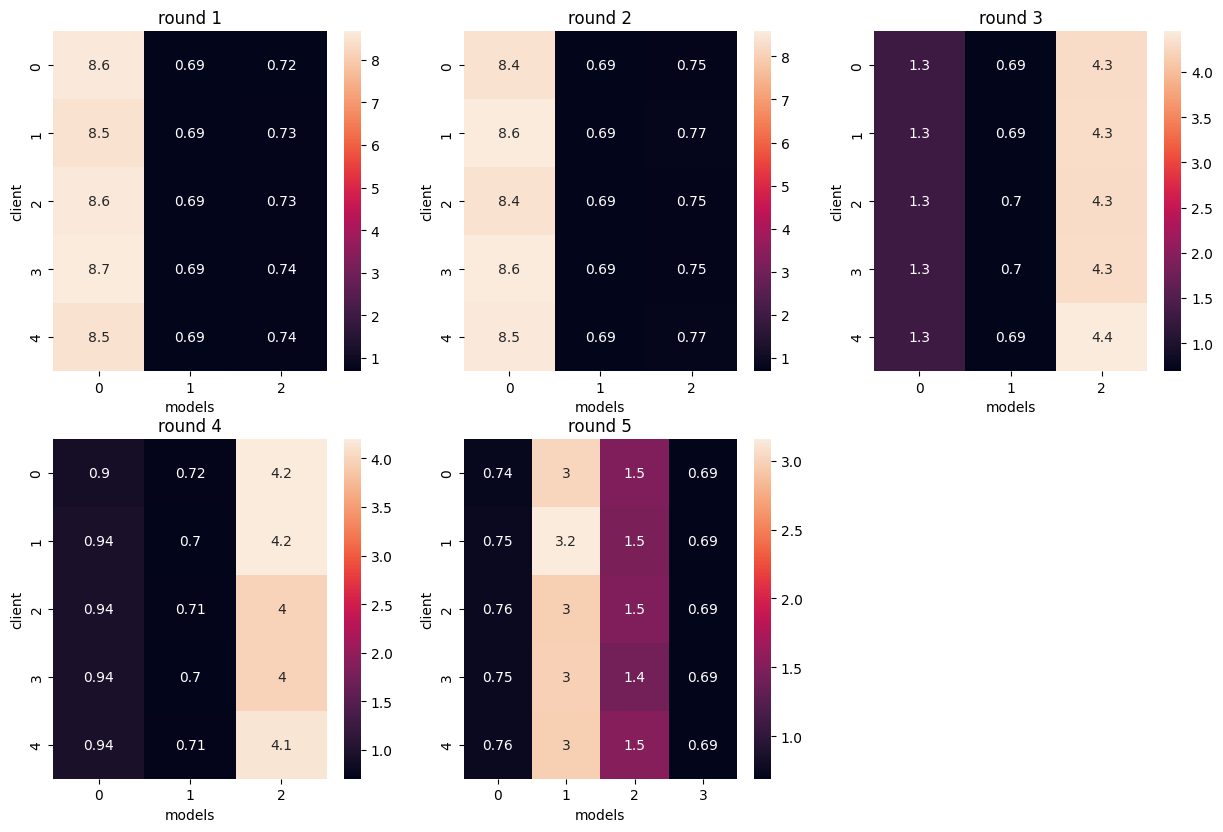

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

ax=plt.axes()

c=1
for idx,i in enumerate(rounds_losses):
    plt.subplot(3,3,c)
    sns.heatmap(np.array(i),annot=True)
    plt.title(f"round {idx+1}")
    plt.xlabel("models")
    plt.ylabel("client")
    #plt.x_ticks()
    c+=1

In [83]:
for i in range(len(rounds_losses)):
    print(f"round {i+1}")
    print()
    for j in range(num_clients):
        print(rounds_losses[i][j])

round 1

[8.62977982 0.69314635 0.71699268]
[8.45787239 0.69314635 0.7278986 ]
[8.62977982 0.69314635 0.73251957]
[8.66416073 0.69314635 0.73551416]
[8.45787239 0.69314635 0.73551416]
round 2

[8.37184429 0.69314635 0.74855202]
[8.58163643 0.69299847 0.76697117]
[8.38026142 0.69299847 0.74855202]
[8.58163643 0.69314635 0.74855202]
[8.54410934 0.69270271 0.76697117]
round 3

[1.30358207 0.69225973 4.2921834 ]
[1.29906869 0.69240701 4.30486059]
[1.30174339 0.69614089 4.2921834 ]
[1.30174339 0.69614089 4.30844307]
[1.29906869 0.69240701 4.44826031]
round 4

[0.89587134 0.72142833 4.20049906]
[0.942954   0.70094734 4.20049906]
[0.942954   0.71499562 3.98059702]
[0.942954   0.70079941 3.98059702]
[0.942954   0.71499562 4.13581324]
round 5

[0.73875165 3.02229357 1.48286653 0.69084537]
[0.7487886  3.15733743 1.4708066  0.69372642]
[0.76262909 2.96941733 1.48879039 0.69372642]
[0.7487886  2.98310423 1.42179108 0.69372976]
[0.75691986 2.96941733 1.52582574 0.69372642]


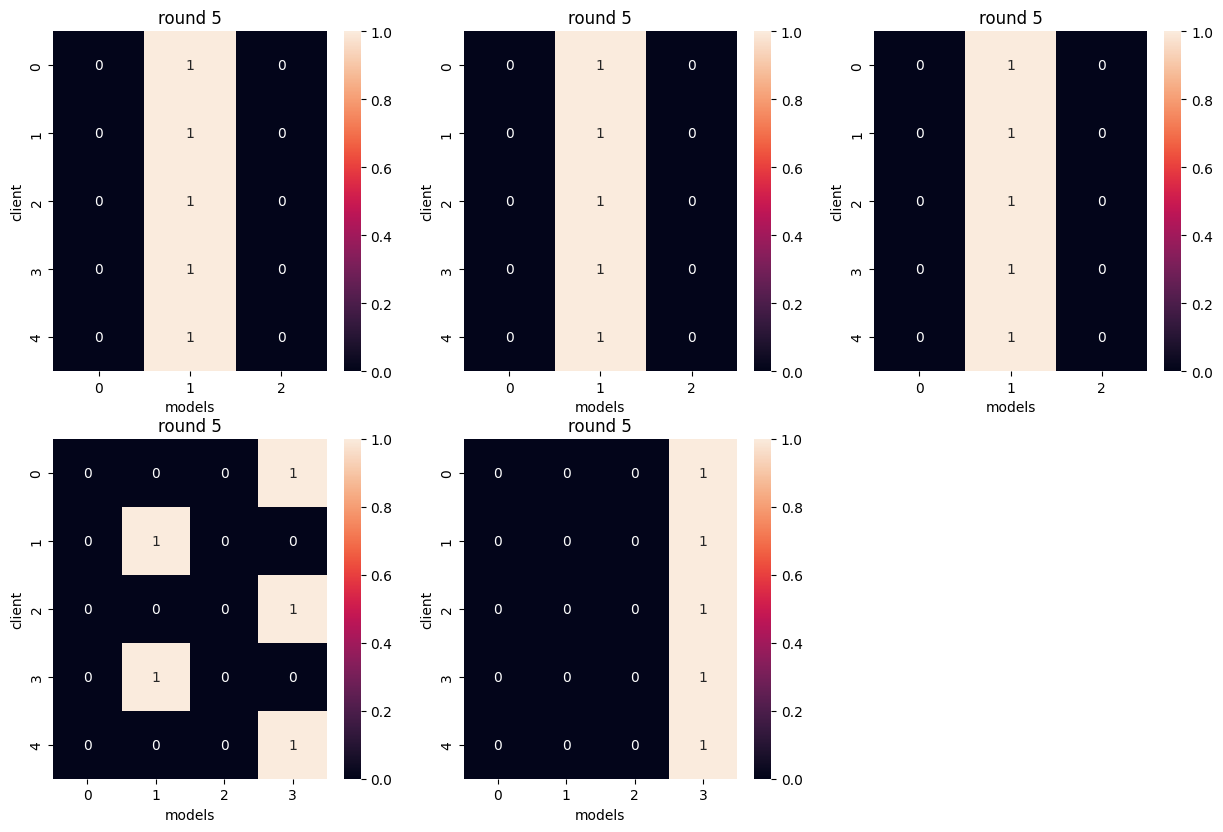

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

c=1
for i in tally_arr:
    plt.subplot(3,3,c)
    sns.heatmap(np.array(i),annot=True)
    plt.title(f"round {idx+1}")
    plt.xlabel("models")
    plt.ylabel("client")
    c+=1

In [85]:
for x,i in enumerate(tally_arr):
    print(f"round : {x+1}")
    print()
    for y,j in enumerate(i):
        print(f"client {y+1}")
        for k in j:
            print(int(k),end="  ")
        print()
    print()

round : 1

client 1
0  1  0  
client 2
0  1  0  
client 3
0  1  0  
client 4
0  1  0  
client 5
0  1  0  

round : 2

client 1
0  1  0  
client 2
0  1  0  
client 3
0  1  0  
client 4
0  1  0  
client 5
0  1  0  

round : 3

client 1
0  1  0  
client 2
0  1  0  
client 3
0  1  0  
client 4
0  1  0  
client 5
0  1  0  

round : 4

client 1
0  0  0  1  
client 2
0  1  0  0  
client 3
0  0  0  1  
client 4
0  1  0  0  
client 5
0  0  0  1  

round : 5

client 1
0  0  0  1  
client 2
0  0  0  1  
client 3
0  0  0  1  
client 4
0  0  0  1  
client 5
0  0  0  1  



# rough work

In [86]:
tally_arr

[array([[0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]], dtype=int8),
 array([[0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]], dtype=int8),
 array([[0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]], dtype=int8),
 array([[0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.]]),
 array([[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]])]